# **CoronaHack - Fine tuning resnet18 pre-trained model with Pytorch**

#### We will be analysing the train dataset and fine tuning a pre-trained model

#### **Downloading Dataset from Kaggle (Optional)** 

In [ ]:
# Downloading dataset:
from zipfile import ZipFile
import os
import pandas as pd

# The below code is ran in google colab
os.environ["KAGGLE_USERNAME"] = "KAGGLE_USERNAME"  # username from the json file
os.environ["KAGGLE_KEY"] = "KAGGLE_KEY"  # key from the json file
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset  # api copied from kaggle

# Create a ZipFile Object and load chest-xray-pneumonia.zip in it
with ZipFile("/content/coronahack-chest-xraydataset.zip", "r") as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall()

# KAGGLE LINK: https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset


#### **Moving train dataset to designated directory** 

#### We will move the images used for training and testing by reading the 'Chest_xray_Corona_Metadata.csv' which contains the information about each image.We will split the dataset into images which are mapped with label normal as one class and the labels mapped with Pneumonia as infected

In [1]:
import pandas as pd
data = pd.read_csv("../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")
data

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [2]:
# Printing unique labels
unique_labels = []
for i in  data['Label']:
    if i not in unique_labels:
        unique_labels.append(i)
        
print(unique_labels)

['Normal', 'Pnemonia']


In [3]:
import os
import pandas as pd
import time
import shutil

PATH_TRAIN = "../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
TOTAL_IMGS = len(os.listdir(PATH_TRAIN))
normal = 0
infected = 0



img = data["X_ray_image_name"]
label = data["Label"]
image_type = data["Dataset_type"]
all_dir = os.listdir(PATH_TRAIN)

os.mkdir("train")
os.mkdir('train/INFECTED')
os.mkdir("train/NORMAL")

wrong_info = 0  # Checking if the provided list maps the images correctly

# Moving the train images to designated folders

for i in range(len(image_type)):
    if image_type[i] == "TRAIN":
        if img[i] in all_dir: # Make sure that all images in Chest_xray_Corona_Metadata.csv is mapped
            if label[i] == "Normal":
                infected = infected + 1
                shutil.copy(
                    PATH_TRAIN + "/" + img[i], "train/NORMAL/" + img[i]
                )
                normal = normal + 1

            else:

                shutil.copy(
                    PATH_TRAIN + "/" + img[i], "train/INFECTED/" + img[i]
                )
                infected = infected + 1

        else:
            wrong_info = wrong_info + 1

print(
    "X-ray of Normal patients (TRAIN DATASET): " + str(normal),
    "X-ray of Infected patients (TRAIN DATASET): " + str(infected),
    end = "\n"
)


X-ray of Normal patients (TRAIN DATASET): 1342 X-ray of Infected patients (TRAIN DATASET): 5286


#### **Visualizing train dataset** 

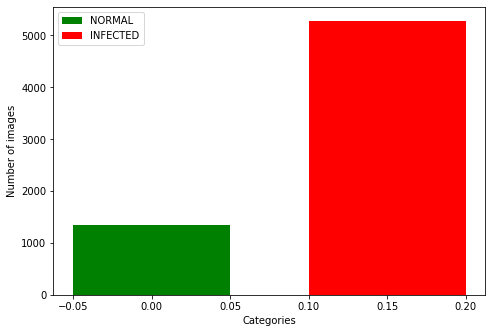

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [normal, infected]
ax.bar(0, number_of_imgs[0], color="g", width=0.1)
ax.bar(0.15, number_of_imgs[1], color="r", width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()


#### **Moving test dataset to designated directory** 

In [5]:
PATH_TEST = "../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"
TOTAL_IMGS = len(os.listdir(PATH_TEST))
normal = 0
infected = 0

img = data["X_ray_image_name"]
label = data["Label"]
image_type = data["Dataset_type"]
all_dir = os.listdir(PATH_TEST)

os.mkdir("test")
os.mkdir('test/INFECTED')
os.mkdir("test/NORMAL")



wrong_info = 0

for i in range(len(image_type)):
    if image_type[i] == "TEST":
        if img[i] in all_dir:
            if label[i] == "Normal":
                infected = infected + 1
                shutil.copy(
                    PATH_TEST + "/" + img[i], "test/NORMAL/" + img[i]
                )
                normal = normal + 1

            else:

                shutil.copy(
                    PATH_TEST + "/" + img[i], "test/INFECTED/" + img[i]
                )
                infected = infected + 1

        else:
            wrong_info = wrong_info + 1

print(
    "X-ray of Normal patients (TEST DATASET): " + str(normal),
    "X-ray of Infected patients (TEST DATASET): " + str(infected),
    end = "\n"
)



X-ray of Normal patients (TEST DATASET): 234 X-ray of Infected patients (TEST DATASET): 624


#### **Visualizing test dataset** 

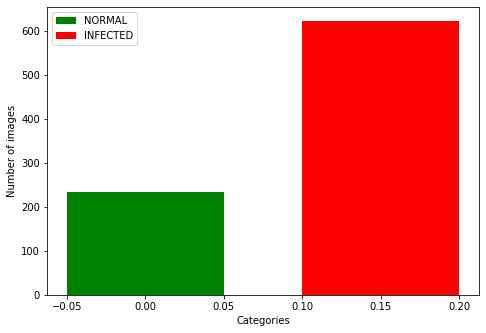

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [normal, infected]
ax.bar(0, number_of_imgs[0], color="g", width=0.1)
ax.bar(0.15, number_of_imgs[1], color="r", width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

#### **Exploring train dataset** 

In [8]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        n = 0
        for f in files:
            n = n+1
            if n>5:
                print('{}{}'.format(subindent, f),end = "  ...... \n")
                break
            print('{}{}'.format(subindent, f))


list_files("/content/Coronahack-Chest-XRay-Dataset")

## **Exploring train dataset** 

Whenever you see an area of increased density within the lung, it must be the result of one of these four patterns.

1.   **Consolidation ** - any pathologic process that fills the alveoli with fluid, pus, blood, cells (including tumor cells) or other substances resulting in lobar, diffuse or multifocal ill-defined opacities.

2.   **Interstitial ** - involvement of the supporting tissue of the lung parenchyma resulting in fine or coarse reticular opacities or small nodules.

3.   **Nodule or mass** - any space occupying lesion either solitary or multiple.

4.   **Atelectasis** - collapse of a part of the lung due to a decrease in the amount of air in the alveoli resulting in volume loss and increased density.

<img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/01/ds00135_im00621_pnuesmal_gif.png" width="450px">



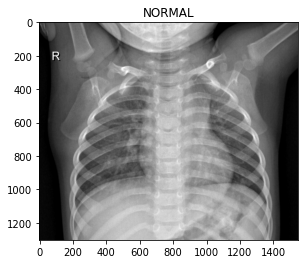

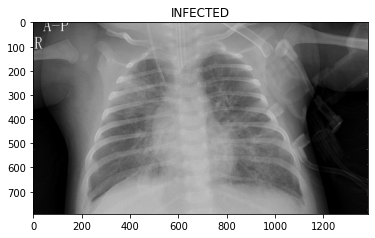

In [9]:
import cv2

normal_sample = cv2.imread("train/NORMAL/"+os.listdir("train/NORMAL")[3])
infected_sample = cv2.imread("train/INFECTED/"+os.listdir("train/INFECTED")[2])

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

The difference can be seen with different visualizations below

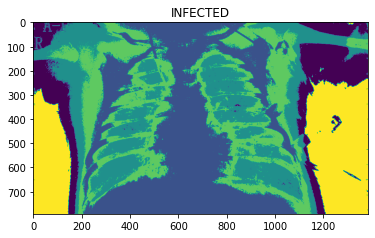

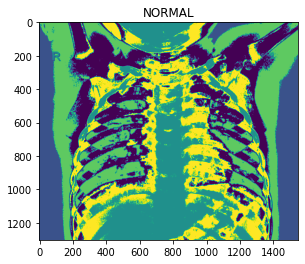

In [10]:
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(5)
dims = np.shape(infected_sample)
pixel_matrix = np.reshape(infected_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("INFECTED")
plt.show()

kmeans = cluster.KMeans(5)
dims = np.shape(normal_sample)
pixel_matrix = np.reshape(normal_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("NORMAL")
plt.show()


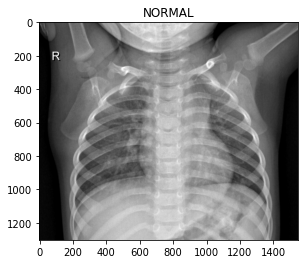

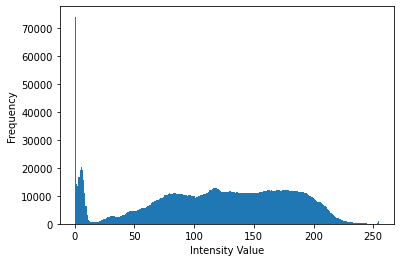

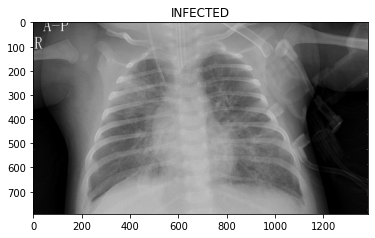

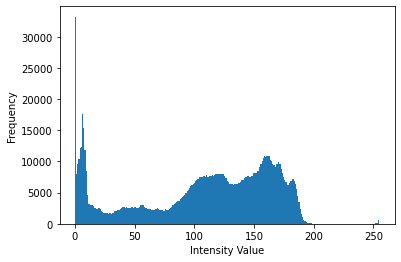

In [11]:
from skimage import io
import matplotlib.pyplot as plt

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

image = io.imread("train/NORMAL/"+os.listdir("train/NORMAL")[3])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

image = io.imread("train/INFECTED/"+os.listdir("train/INFECTED")[2])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

#### **Initializing the data loader** 

vgg16 pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.<br />
The images have to be loaded in to a range of [0, 1] and then normalized using:
 #### mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225] <br />
 
 We are applying augmentation like random rotation , horizontal and vertical flips to make sre the model doesn't overfit or learn the wrong features
 

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import torchvision
from PIL import ImageFile
import matplotlib.pyplot as plt
import cv2

In [15]:
ImageFile.LOAD_TRUNCATED_IMAGES = True # To prevent error during loading broken images

PATH_TRAIN = "train"
PATH_TEST  = "test"
EPOCHS = 10
BATCH_SIZE = 32
TOTAL_SIZE = len(os.listdir(PATH_TRAIN + "/NORMAL")) + len(
    os.listdir(PATH_TRAIN + "/INFECTED")
)
TOTAL_TEST_SIZE = len(os.listdir(PATH_TEST + "/NORMAL")) + len(
    os.listdir(PATH_TEST + "/INFECTED")
)
STEPS_PER_EPOCH = TOTAL_SIZE // BATCH_SIZE
STEPS_PER_TEST_EPOCH = TOTAL_TEST_SIZE // BATCH_SIZE
IMAGE_H, IMAGE_W = 224, 224

In [16]:
transform = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((IMAGE_H, IMAGE_W)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(30),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)  # Normalizing data

# Intitalizing the train data loader and applying the transformations

train_dataset = torchvision.datasets.ImageFolder(root=PATH_TRAIN, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

# Intitalizing the test data loader

test_dataset = torchvision.datasets.ImageFolder(
    root=PATH_TEST, transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

## **Initializing pretrained resnet18 model** 



<img src="https://d2l.ai/_images/residual-block.svg" width="500px">




ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.
However, increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient extremely small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.

In [18]:
model_ft = torchvision.models.resnet18(False)  # Initializing resnet18
model_ft.load_state_dict(torch.load("../input/pretrained-pytorch-models/resnet18-5c106cde.pth"))
num_ftrs = model_ft.fc.in_features # Getting last layer's output features
model_ft.fc = nn.Linear(num_ftrs, 2) # Modifying the last layer accordng to our need

## **Initializing optimizers and loss function** <br/>
We will also specify the learning rate of the optimiser, here in this case it is set at 0.0001. If our training is bouncing a lot on epochs then we need to decrease the learning rate so that we can reach global minima.

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft.to(device)  # Sending model to device
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model_ft.parameters(), lr=0.0007
)  # lr should be kept low so that the pre-trained weights don't change easily

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

1.    Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
2.    Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).


#### **TESTING THE MODEL** 

In [20]:
def get_test():
    test_loss = []
    correct = 0
    incorrect = 0

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    for batch_idx, (data, target) in enumerate(test_loader):
        if batch_idx == STEPS_PER_TEST_EPOCH:
            break

        # Model is used to predict the test data so we are switching off the gradient

        with torch.no_grad():

            data = data.to(device)
            target = target.long().to(device)
            output = model_ft(data)
            criterion = nn.CrossEntropyLoss()
            loss = criterion(output, target)

            # Note that optimizer is not used because the model shouldn't learn the test dataset

            for i in range(BATCH_SIZE):
                a = []
                for j in output[i]:
                    a.append(float(j.detach()))

                pred = a.index(max(a))

                if pred == int(target[i]):
                    correct = correct + 1

                else:
                    incorrect = incorrect + 1

        test_loss.append(float(loss.detach()))
    print("CORRECT: " + str(correct), "INCORRECT: " + str(incorrect),"TEST ACCURACY: "+str(correct/(correct+incorrect)))
    return (
            correct/(incorrect+correct),
            sum(test_loss)/len(test_loss),
    )





In [21]:
acc_ , loss_ = get_test()
print("ACCURACY AND LOSS BEFORE TUNING")
print("ACCURACY : "+str(acc_),"LOSS : "+str(loss_))

CORRECT: 372 INCORRECT: 236 TEST ACCURACY: 0.6118421052631579
ACCURACY AND LOSS BEFORE TUNING
ACCURACY : 0.6118421052631579 LOSS : 0.6559573568795857


#### **TUNING THE MODEL (TRAINING)** 

In [22]:
avg_test_loss_history = []
avg_test_accuracy_history = []
avg_train_loss_history = []
avg_train_accuracy_history = []

loss_history = []
accuracy_history = []

new_best = 0

for i in range(EPOCHS):

    start = time.time()
    print(
        "-----------------------EPOCH "
        + str(i)
        + " -----------------------------------"
    )
    for batch_idx, (data, target) in enumerate(train_loader):
        if batch_idx == STEPS_PER_EPOCH:
            break
        optimizer.zero_grad()  # Resetting gradients after each optimizations
        # Sending input , target to device
        data = data.to(device) 
        target = target.to(device)
        output = model_ft(data)
        loss = criterion(output, target.reshape((BATCH_SIZE,)).long())
        loss_history.append(loss.detach())
        # The loss variable has gradient attached to it so we are removing it so that it can be used to plot graphs
        loss.backward()
        optimizer.step()  # Optimizing the model

        # Checking train accuracy

        correct = 0
        incorrect = 0
        for p in range(BATCH_SIZE):
            a = []
            for j in output[p]:
                a.append(float(j.detach()))

            pred = a.index(max(a))

            if pred == int(target[p]):
                correct = correct + 1

            else:

                incorrect = incorrect + 1

        print(
            "\r EPOCH "
            + str(i)
            + " MINIBATCH: "
            + str(batch_idx)
            + "/"
            + str(STEPS_PER_EPOCH)
            + " LOSS: "
            + str(loss_history[-1]),
            end = ""
            
        )
        
        accuracy_history.append(correct/(correct+incorrect))

    end = time.time()
    print(
        " \n EPOCH "
        + str(i)
        + " LOSS "
        + str(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
        + " ETA: "
        + str(end - start)
        + " \n MAX LOSS: "
        + str(max(loss_history[-STEPS_PER_EPOCH:]))
        + " MIN LOSS: "
        + str(min(loss_history[-STEPS_PER_EPOCH:]))
        + " TRAIN ACCURACY: "
        + str(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    )
    
    avg_train_loss_history.append(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    avg_train_accuracy_history.append(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    
    test_acc , test_loss  = get_test()
    
    avg_test_accuracy_history.append(test_acc)
    avg_train_loss_history.append(test_loss)
    
    if test_acc>new_best: 
        new_best = test_acc
        torch.save(model_ft.state_dict(), "/model.pth") # Saving our best model


-----------------------EPOCH 0 -----------------------------------
 EPOCH 0 MINIBATCH: 164/165 LOSS: tensor(0.0563) 
 EPOCH 0 LOSS tensor(0.1698) ETA: 660.6455388069153 
 MAX LOSS: tensor(1.2050) MIN LOSS: tensor(0.0168) TRAIN ACCURACY: 0.9299242424242424
CORRECT: 518 INCORRECT: 90 TEST ACCURACY: 0.8519736842105263
-----------------------EPOCH 1 -----------------------------------
 EPOCH 1 MINIBATCH: 164/165 LOSS: tensor(0.1048) 
 EPOCH 1 LOSS tensor(0.1110) ETA: 657.9106729030609 
 MAX LOSS: tensor(0.4547) MIN LOSS: tensor(0.0084) TRAIN ACCURACY: 0.9575757575757575
CORRECT: 493 INCORRECT: 115 TEST ACCURACY: 0.8108552631578947
-----------------------EPOCH 2 -----------------------------------
 EPOCH 2 MINIBATCH: 164/165 LOSS: tensor(0.1143) 
 EPOCH 2 LOSS tensor(0.0986) ETA: 657.375536441803 
 MAX LOSS: tensor(0.5026) MIN LOSS: tensor(0.0051) TRAIN ACCURACY: 0.9638257575757576
CORRECT: 519 INCORRECT: 89 TEST ACCURACY: 0.8536184210526315
-----------------------EPOCH 3 ------------------

We have saved the model with best accuracy as **model.pt**

In [23]:
print("ACCURACY : ",new_best)

ACCURACY :  0.8980263157894737


#### Plotting the loss produced by model during training

Text(0, 0.5, 'LOSS')

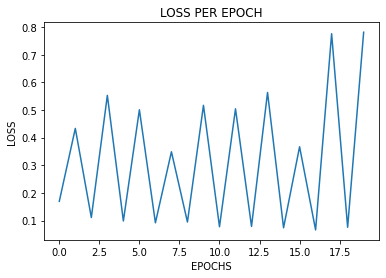

In [24]:
plt.plot(avg_train_loss_history,label = "Train")
plt.plot(avg_test_loss_history , label = "Test")
plt.title('LOSS PER EPOCH')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")

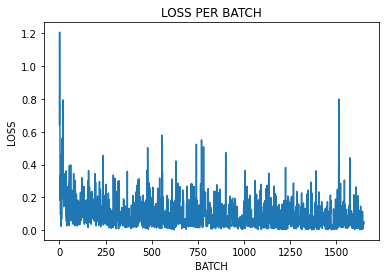

In [25]:
plt.plot(loss_history)
plt.title('LOSS PER BATCH')
plt.xlabel("BATCH")
plt.ylabel("LOSS")
plt.show()

#### Plotting the accuracy produced by model during training

Text(0, 0.5, 'ACCURACY')

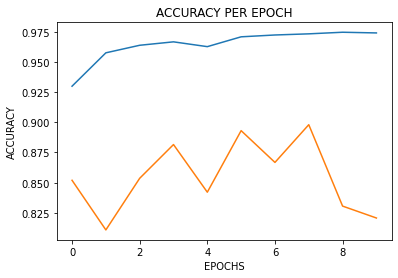

In [26]:
plt.plot(avg_train_accuracy_history , label = "Train")
plt.plot(avg_test_accuracy_history , label = "Test")
plt.title('ACCURACY PER EPOCH')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")

This model was able to produce about 90 to 95% accuracy in different runs. This inconsistent result is due to model's random weight and bias initialization.Code to run in Google colab can be found [here](https://github.com/FrozenWolf-Cyber/Corona-Detection/blob/master/CoronaHack_Finetuning_resnet18_pytorch.ipynb).You can also checkout tuning of pre-trained vgg16 model with pneumonia dataset [here](https://github.com/FrozenWolf-Cyber/Pneumonia-Detection)